In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import neural_network
from sklearn import linear_model
from sklearn import tree
import graphviz 
import numpy as np
from scipy import stats 
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import ExtraTreesClassifier
 

# Cargamos las bases de datos (excel)


In [2]:
#Cargamos las bases de datos

db_displasia = pd.read_excel('SMD.xls')


db_hepatopata = pd.read_excel('Hepatopata.xls')


db_oncologicos = pd.read_excel('Oncologicos.xls')


db_PTI = pd.read_excel('PTI.xls')



# Información de cada una de las db

In [3]:
#Informacion SMD
db_displasia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Columns: 110 entries, LEU to ESSYS
dtypes: float64(93), int64(9), object(8)
memory usage: 358.4+ KB


In [4]:
#Informacion Hepatopata
db_hepatopata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 88 columns):
LEU      342 non-null float64
NEU      342 non-null float64
NEUp     342 non-null float64
LIN      342 non-null float64
LINp     342 non-null float64
MON      342 non-null float64
MONp     342 non-null float64
EOS      342 non-null float64
EOSp     342 non-null float64
BAS      342 non-null float64
BASp     342 non-null float64
IG       342 non-null float64
IGp      342 non-null float64
ERIT     342 non-null float64
HGB      342 non-null float64
HCT      342 non-null float64
VCM      342 non-null float64
HCM      342 non-null float64
CHCM     342 non-null float64
RDW      342 non-null object
ERBL     342 non-null float64
ERBLp    342 non-null float64
RET      49 non-null float64
RETp     49 non-null float64
FRI      49 non-null float64
RETHE    49 non-null float64
PLT      341 non-null float64
VPM      342 non-null object
IPF      234 non-null float64
HIPER    49 non-null float64
HY

In [5]:
#Informacion oncologicos
db_oncologicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 88 columns):
LEU      303 non-null float64
NEU      303 non-null float64
NEUp     303 non-null float64
LIN      303 non-null float64
LINp     303 non-null float64
MON      303 non-null float64
MONp     303 non-null float64
EOS      303 non-null float64
EOSp     303 non-null float64
BAS      303 non-null float64
BASp     303 non-null float64
IG       303 non-null float64
IGp      303 non-null float64
ERIT     303 non-null float64
HGB      303 non-null float64
HCT      303 non-null float64
VCM      303 non-null float64
HCM      303 non-null float64
CHCM     303 non-null float64
RDW      303 non-null float64
ERBL     303 non-null float64
ERBLp    303 non-null float64
RET      82 non-null float64
RETp     82 non-null float64
FRI      82 non-null float64
RETHE    82 non-null float64
PLT      302 non-null float64
VPM      303 non-null object
IPF      82 non-null float64
HIPER    82 non-null float64
HY

In [6]:
#Informacion PTI
db_PTI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Columns: 110 entries, LEU to ESSYS
dtypes: float64(93), int64(10), object(7)
memory usage: 172.8+ KB


# Eliminamos las variables acordadas y añadimos Diagnostico

In [7]:
#Reduccion de dimensionalidad (Preprocesamiento y limpieza de datos)
db_smd = db_displasia.drop(['PLTI','PLTF','PLTO','MNEU','MLIN','MMON','MBAS','MEOS','MCAS','MMET','MMIE','MPRO','CPLAS','MBLS','MERI','FRSP','COMHE','AVSBL','AVSPL','AVSRJ','AVNRB','ESSYS','WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)


In [8]:
#Añadimos una nueva variable que identifique la patologia

db_smd['Diagnosis']=np.zeros((417,1),dtype=np.int8)


In [9]:
db_hpt = db_hepatopata.drop(['WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)


In [10]:
#Añadimos una variable que identifique el diagnostico
db_hpt['Diagnosis']=np.ones((342,1),dtype=np.int8)

In [11]:
db_onc = db_oncologicos.drop(['WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)


In [12]:
#Añadimos una variable que identifique el diagnostico
db_onc['Diagnosis']=np.full((303,1),2)

In [13]:
#Reduccion de dimensionalidad (Preprocesamiento y limpieza de datos)
db_pti = db_PTI.drop(['PLTI','PLTF','PLTO','MNEU','MLIN','MMON','MBAS','MEOS','MCAS','MMET','MMIE','MPRO','CPLAS','MBLS','MERI','FRSP','COMHE','AVSBL','AVSPL','AVSRJ','AVNRB','ESSYS','WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)


In [14]:
#Añadimos una variable que identifique el diagnostico
db_pti['Diagnosis']=np.full((201,1),3)


# Fusionamos las db y representamos diagrama de cajas y bigotes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1263 entries, 0 to 200
Data columns (total 50 columns):
LEU          1263 non-null float64
NEU          1262 non-null float64
LIN          1262 non-null float64
MON          1262 non-null float64
EOS          1262 non-null float64
BAS          1262 non-null float64
IG           1262 non-null float64
ERIT         1263 non-null float64
HGB          1263 non-null float64
HCT          1263 non-null float64
VCM          1263 non-null float64
HCM          1263 non-null float64
CHCM         1263 non-null float64
ERBL         1263 non-null float64
PLT          1257 non-null float64
MacR         1263 non-null float64
MicR         1263 non-null float64
NE_R         1262 non-null float64
LY_R         1262 non-null float64
MO_R         1262 non-null float64
EO_R         1262 non-null float64
BA_R         1262 non-null float64
BA-D#        1262 non-null float64
BA-N#        1262 non-null float64
HFLCA        1262 non-null float64
HFLCP        1262 n

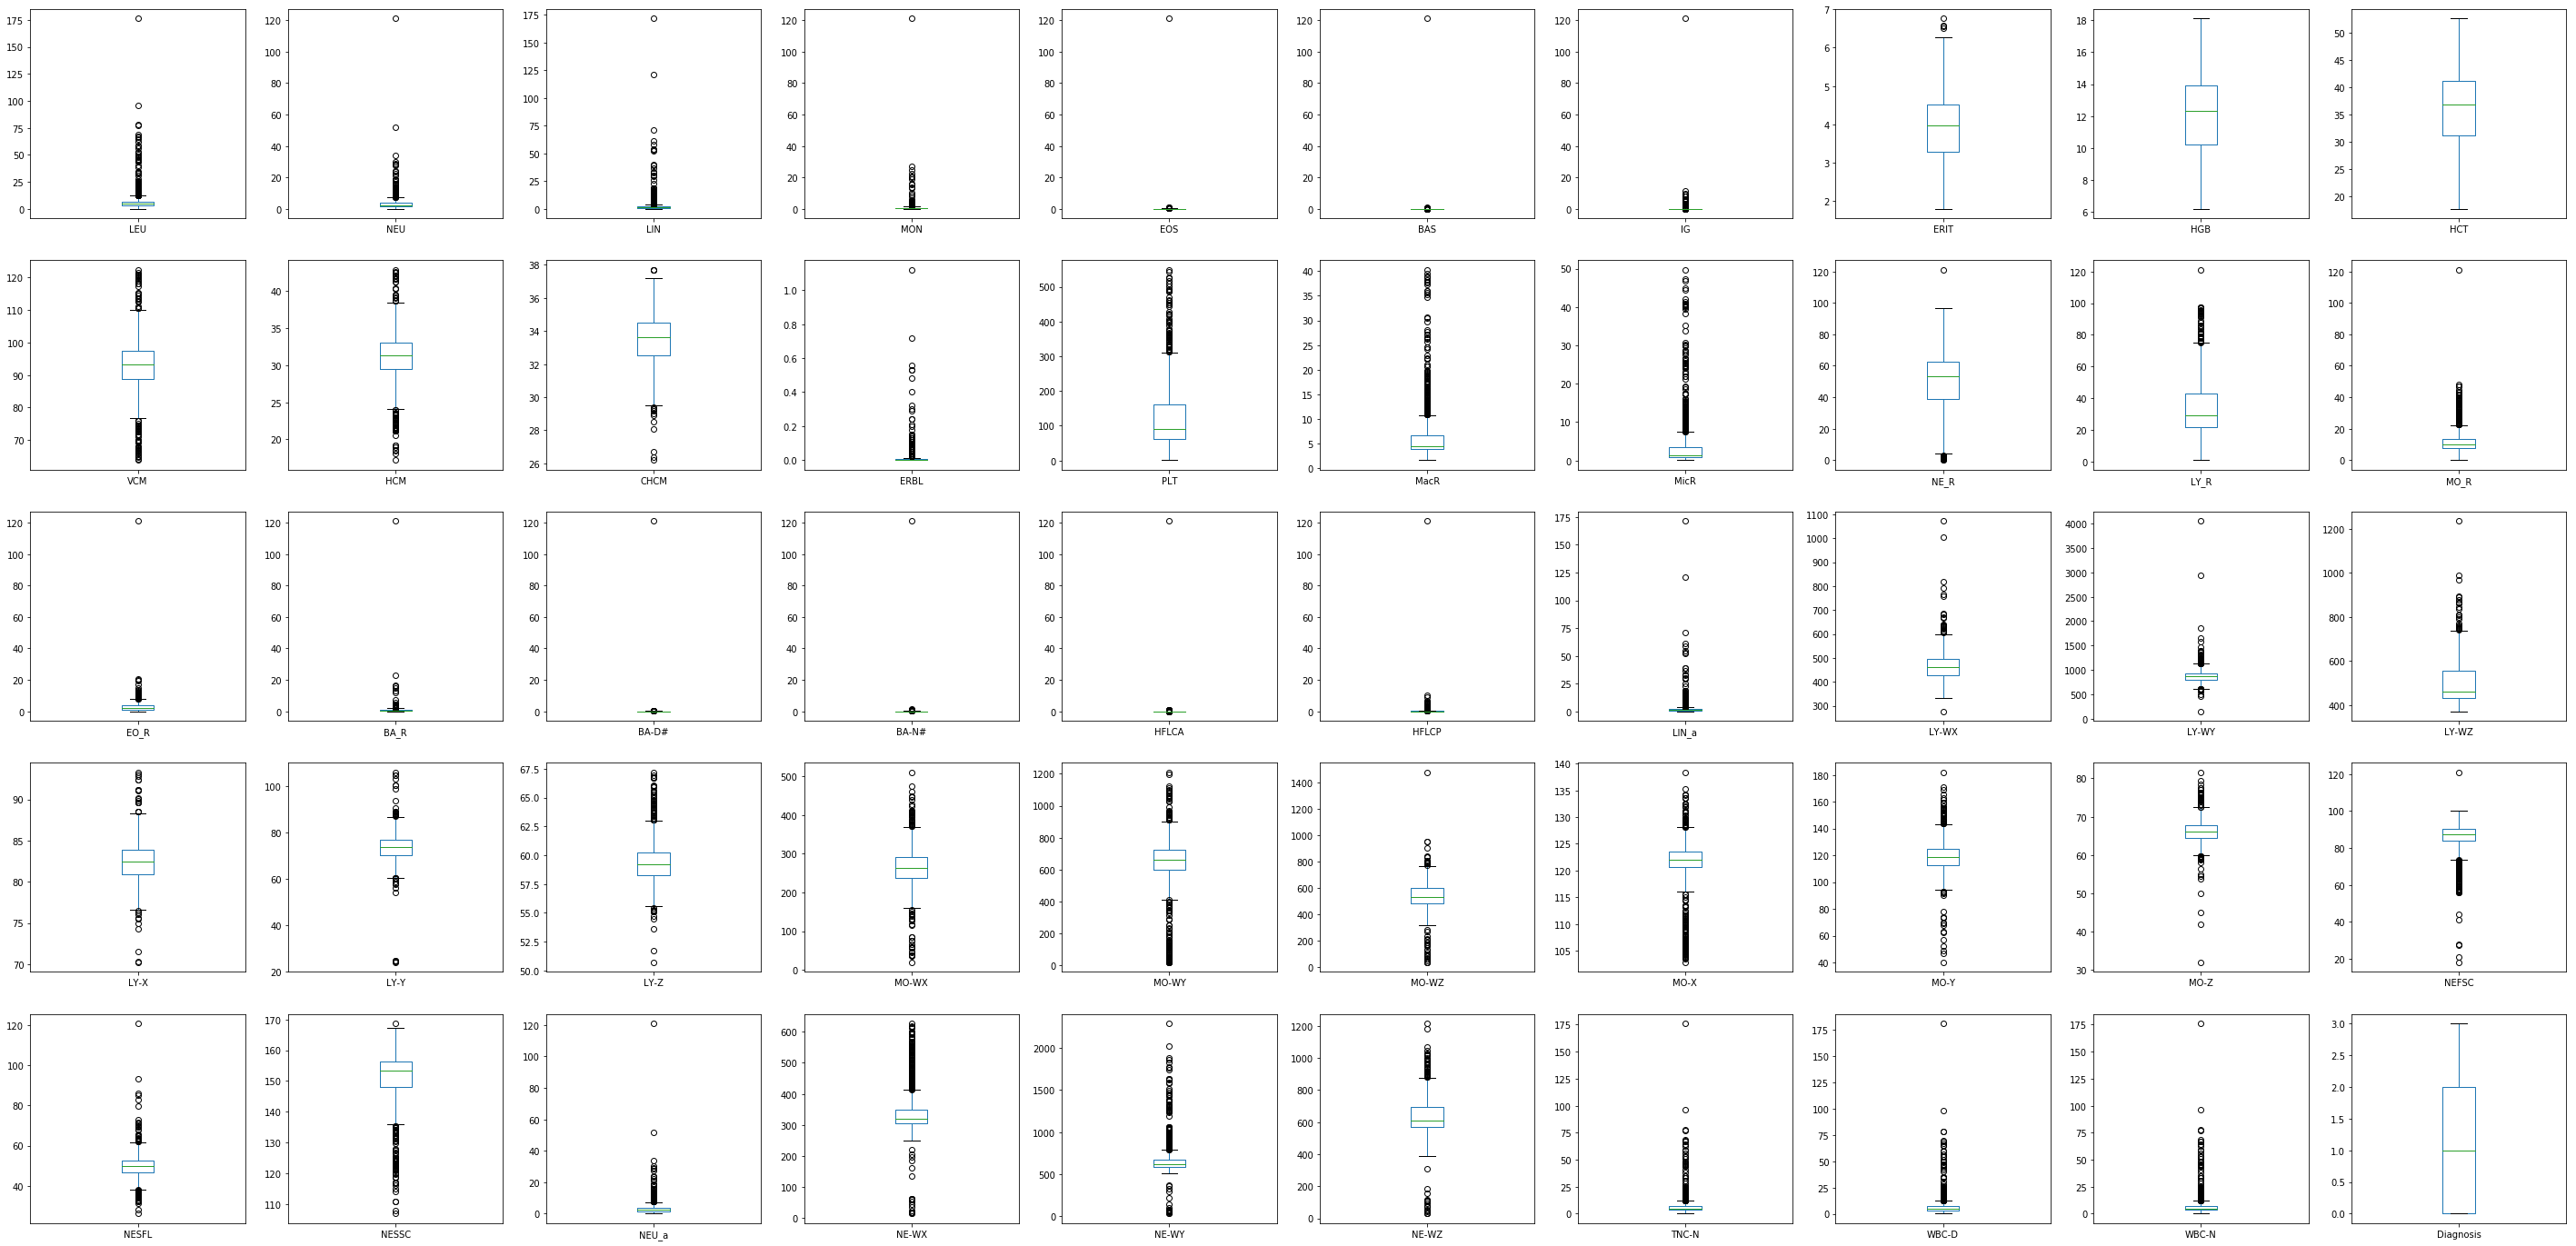

In [15]:
db_smd_hpt = pd.concat([db_smd,db_hpt,db_onc,db_pti])

db_smd_hpt.info()

db_smd_hpt = db_smd_hpt.replace(np.nan ,np.mean(db_smd_hpt['PLT']))




db_smd_hpt.plot(kind='box',subplots=True, layout= (10,10), sharex= False, sharey = False, figsize = (50,50))
plt.show()



# Opcional: Eliminar los outliers utilizando z-score

In [16]:
#Obtenemos z-score

z = np.abs(stats.zscore(db_smd_hpt))


#Establecemps un umbral 

threshold = 2
pos = np.where(z >threshold)

#Eliminamos los outliers identificados por z-score 

#db_smd_hpt = db_smd_hpt[(z < threshold).all(axis=1)]

# Aleatorizamos y realizamos las particiones (Train y Validacion)

In [17]:
#Realizamos las particiones de entrenamiento y test

x = db_smd_hpt.drop(['Diagnosis'],axis=1)
y = db_smd_hpt['Diagnosis']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)




# Cargamos las bases de datos de Test (una por patologia)

In [18]:
#Cargar bases de datos de test


db_displasia_test = pd.read_excel('smdtest.xls')


db_hepatopata_test = pd.read_excel('hpttest.xls')


db_oncologicos_test = pd.read_excel('oncotest.xls')


db_PTI_test = pd.read_excel('ptitest.xls')



# Eliminamos las variables acordadas e info de db Test


In [19]:
#Limpiamos los datos 
db_smd_test = db_displasia_test.drop(['PLTI','PLTF','PLTO','MNEU','MLIN','MMON','MBAS','MEOS','MCAS','MMET','MMIE','MPRO','CPLAS','MBLS','MERI','FRSP','COMHE','WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)
db_smd_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 50 columns):
Número    10 non-null int64
LEU       10 non-null float64
NEU       10 non-null float64
LIN       10 non-null float64
MON       10 non-null float64
EOS       10 non-null float64
BAS       10 non-null float64
IG        10 non-null float64
ERIT      10 non-null float64
HGB       10 non-null float64
HCT       10 non-null float64
VCM       10 non-null float64
HCM       10 non-null float64
CHCM      10 non-null float64
ERBL      10 non-null float64
PLT       10 non-null int64
MacR      10 non-null float64
MicR      10 non-null float64
NE_R      10 non-null float64
LY_R      10 non-null float64
MO_R      10 non-null float64
EO_R      10 non-null float64
BA_R      10 non-null float64
BA-D#     10 non-null float64
BA-N#     10 non-null float64
HFLCA     10 non-null float64
HFLCP     10 non-null float64
LIN_a     10 non-null float64
LY-WX     10 non-null int64
LY-WY     10 non-null int64
LY-WZ 

In [20]:
db_hpt_test = db_hepatopata_test.drop(['PLTI','PLTF','PLTO','MNEU','MLIN','MMON','MBAS','MEOS','MCAS','MMET','MMIE','MPRO','CPLAS','MBLS','MERI','FRSP','COMHE','WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)
db_hpt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 50 columns):
Número    19 non-null int64
LEU       19 non-null float64
NEU       19 non-null float64
LIN       19 non-null float64
MON       19 non-null float64
EOS       19 non-null float64
BAS       19 non-null float64
IG        19 non-null float64
ERIT      19 non-null float64
HGB       19 non-null float64
HCT       19 non-null float64
VCM       19 non-null float64
HCM       19 non-null float64
CHCM      19 non-null float64
ERBL      19 non-null float64
PLT       19 non-null int64
MacR      19 non-null float64
MicR      19 non-null float64
NE_R      19 non-null float64
LY_R      19 non-null float64
MO_R      19 non-null float64
EO_R      19 non-null float64
BA_R      19 non-null float64
BA-D#     19 non-null float64
BA-N#     19 non-null float64
HFLCA     19 non-null float64
HFLCP     19 non-null float64
LIN_a     19 non-null float64
LY-WX     19 non-null int64
LY-WY     19 non-null int64
LY-WZ

In [21]:
db_onc_test = db_oncologicos_test.drop(['PLTI','PLTF','PLTO','MNEU','MLIN','MMON','MBAS','MEOS','MCAS','MMET','MMIE','MPRO','CPLAS','MBLS','MERI','FRSP','COMHE','WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)
db_onc_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 50 columns):
Número    19 non-null int64
LEU       19 non-null float64
NEU       19 non-null float64
LIN       19 non-null float64
MON       19 non-null float64
EOS       19 non-null float64
BAS       19 non-null float64
IG        19 non-null float64
ERIT      19 non-null float64
HGB       19 non-null float64
HCT       19 non-null float64
VCM       19 non-null float64
HCM       19 non-null float64
CHCM      19 non-null float64
ERBL      19 non-null float64
PLT       19 non-null int64
MacR      19 non-null float64
MicR      19 non-null float64
NE_R      19 non-null float64
LY_R      19 non-null float64
MO_R      19 non-null float64
EO_R      19 non-null float64
BA_R      19 non-null float64
BA-D#     19 non-null float64
BA-N#     19 non-null float64
HFLCA     19 non-null float64
HFLCP     19 non-null float64
LIN_a     19 non-null float64
LY-WX     19 non-null int64
LY-WY     19 non-null int64
LY-WZ

In [22]:
db_pti_test = db_PTI_test.drop(['Fecha','Código Externo','PLTI','PLTF','PLTO','MNEU','MLIN','MMON','MBAS','MEOS','MCAS','MMET','MMIE','MPRO','CPLAS','MBLS','MERI','FRSP','COMHE','WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)
db_pti_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 50 columns):
Número    4 non-null int64
LEU       4 non-null float64
NEU       4 non-null float64
LIN       4 non-null float64
MON       4 non-null float64
EOS       4 non-null float64
BAS       4 non-null float64
IG        4 non-null float64
ERIT      4 non-null float64
HGB       4 non-null float64
HCT       4 non-null float64
VCM       4 non-null float64
HCM       4 non-null float64
CHCM      4 non-null float64
ERBL      4 non-null int64
PLT       4 non-null int64
MacR      4 non-null float64
MicR      4 non-null float64
NE_R      4 non-null float64
LY_R      4 non-null float64
MO_R      4 non-null float64
EO_R      4 non-null float64
BA_R      4 non-null float64
BA-D#     4 non-null float64
BA-N#     4 non-null float64
HFLCA     4 non-null float64
HFLCP     4 non-null float64
LIN_a     4 non-null float64
LY-WX     4 non-null int64
LY-WY     4 non-null int64
LY-WZ     4 non-null int64
LY-X      4 

# Añadimos las variables de Diagnostico sobre Test

In [23]:
#Añadimos una variable que identifique el diagnostico
db_smd_test['Diagnosis']=np.zeros((10,1),dtype=np.int8)


In [24]:
#Añadimos una variable que identifique el diagnostico
db_hpt_test['Diagnosis']=np.ones((19,1),dtype=np.int8)


In [25]:
#Añadimos una variable que identifique el diagnostico
db_onc_test['Diagnosis']=np.full((19,1),2,dtype=np.int8)


In [26]:
#Añadimos una variable que identifique el diagnostico
db_pti_test['Diagnosis']=np.full((4,1),3,dtype=np.int8)


# Seleccion de caracteristicas Sklearn

In [28]:
#Algoritmo univariante de prueba F

n_variables = 10

selector_f = SelectKBest(f_classif, k= n_variables)

selection_f = selector_f.fit(x_train,y_train)

atrib_matrix_f = selection_f.get_support()

atrib_names = x_train.columns.values

print(atrib_names)
print(atrib_matrix_f)

selected_atributes_f = []

for i in range(len(atrib_names)):
    if atrib_matrix_f[i] == True:
        selected_atributes_f.append(atrib_names[i])
        
print(selected_atributes_f)



['LEU' 'NEU' 'LIN' 'MON' 'EOS' 'BAS' 'IG' 'ERIT' 'HGB' 'HCT' 'VCM' 'HCM'
 'CHCM' 'ERBL' 'PLT' 'MacR' 'MicR' 'NE_R' 'LY_R' 'MO_R' 'EO_R' 'BA_R'
 'BA-D#' 'BA-N#' 'HFLCA' 'HFLCP' 'LIN_a' 'LY-WX' 'LY-WY' 'LY-WZ' 'LY-X'
 'LY-Y' 'LY-Z' 'MO-WX' 'MO-WY' 'MO-WZ' 'MO-X' 'MO-Y' 'MO-Z' 'NEFSC'
 'NESFL' 'NESSC' 'NEU_a' 'NE-WX' 'NE-WY' 'NE-WZ' 'TNC-N' 'WBC-D' 'WBC-N']
[False False False False False False False  True  True  True False False
 False False  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False  True False  True  True  True False False
 False]
['ERIT', 'HGB', 'HCT', 'PLT', 'MacR', 'NEFSC', 'NESSC', 'NE-WX', 'NE-WY', 'NE-WZ']


In [29]:
#Eliminacion recursiva de atributos

selector_elim = ExtraTreesClassifier()

era = RFE(selector_elim, 10)

selection_era = era.fit(x_train, y_train)

atrib_matrix_era = selection_era.get_support()

atrib_names = x_train.columns.values

print(atrib_names)
print(atrib_matrix_era)

selected_atributes_era = []

for i in range(len(atrib_names)):
    if atrib_matrix_era[i] == True:
        selected_atributes_era.append(atrib_names[i])
        
print(selected_atributes_era)




['LEU' 'NEU' 'LIN' 'MON' 'EOS' 'BAS' 'IG' 'ERIT' 'HGB' 'HCT' 'VCM' 'HCM'
 'CHCM' 'ERBL' 'PLT' 'MacR' 'MicR' 'NE_R' 'LY_R' 'MO_R' 'EO_R' 'BA_R'
 'BA-D#' 'BA-N#' 'HFLCA' 'HFLCP' 'LIN_a' 'LY-WX' 'LY-WY' 'LY-WZ' 'LY-X'
 'LY-Y' 'LY-Z' 'MO-WX' 'MO-WY' 'MO-WZ' 'MO-X' 'MO-Y' 'MO-Z' 'NEFSC'
 'NESFL' 'NESSC' 'NEU_a' 'NE-WX' 'NE-WY' 'NE-WZ' 'TNC-N' 'WBC-D' 'WBC-N']
[False False False False False False False  True False False False  True
 False False  True False False False  True False False False False False
 False False False False False False False False False False False False
 False False False  True False  True  True  True False  True False  True
 False]
['ERIT', 'HCM', 'PLT', 'LY_R', 'NEFSC', 'NESSC', 'NEU_a', 'NE-WX', 'NE-WZ', 'WBC-D']


# Nuevas bases de datos (F y ERA)

In [33]:
#Base de datos tras F de Fisher

x = db_smd_hpt.drop(['Diagnosis'],axis=1)
x_f = x[selected_atributes_f]
y_f = db_smd_hpt['Diagnosis']

x_f.info()
x_train_f,x_test_f,y_train_f,y_test_f = train_test_split(x_f,y_f, test_size=0.2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1263 entries, 0 to 200
Data columns (total 10 columns):
ERIT     1263 non-null float64
HGB      1263 non-null float64
HCT      1263 non-null float64
PLT      1263 non-null float64
MacR     1263 non-null float64
NEFSC    1263 non-null float64
NESSC    1263 non-null float64
NE-WX    1263 non-null int64
NE-WY    1263 non-null int64
NE-WZ    1263 non-null int64
dtypes: float64(7), int64(3)
memory usage: 108.5 KB


In [35]:
#Base de datos tras ERA
x = db_smd_hpt.drop(['Diagnosis'],axis=1)
x_era = x[selected_atributes_era]
y_era = db_smd_hpt['Diagnosis']

x_era.info()
x_train_era,x_test_era,y_train_era,y_test_era = train_test_split(x_era,y_era, test_size=0.2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1263 entries, 0 to 200
Data columns (total 10 columns):
ERIT     1263 non-null float64
HCM      1263 non-null float64
PLT      1263 non-null float64
LY_R     1263 non-null float64
NEFSC    1263 non-null float64
NESSC    1263 non-null float64
NEU_a    1263 non-null float64
NE-WX    1263 non-null int64
NE-WZ    1263 non-null int64
WBC-D    1263 non-null float64
dtypes: float64(8), int64(2)
memory usage: 108.5 KB
